## Generate paper figures

Inspired by Alex's figure generation script [here](https://github.com/greenelab/generic-expression-patterns/blob/master/figure_generation/figure_generation.py).

In [1]:
import os

from IPython.display import Image, display, SVG
from lxml import etree
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import svgutils.transform as sg

import mpmp.config as cfg

In [2]:
def make_figure_panel(filename, scale_x_input, scale_y_input, x_loc, y_loc):
    """Function to plot individual figure panels."""
    panel = sg.fromfile(filename)

    panel_size = (
        np.round(float(panel.root.attrib["width"][:-2]) * 1.33, 0),
        np.round(float(panel.root.attrib["height"][:-2]) * 1.33, 0),
    )

    scale_x = scale_x_input
    scale_y = scale_y_input

    print(f"original: {panel_size}")
    print(f"scaled:{(panel_size[0]*scale_x,panel_size[1]*scale_y)}")

    panel = panel.getroot()
    panel.scale_xy(x=scale_x, y=scale_y)
    panel.moveto(x_loc, y_loc)

    return panel

### Figure 1

In [3]:
# TODO: make this in inkscape probably

### Figure 2

original: (1857.0, 519.0)
scaled:(1392.75, 389.25)
original: (1408.0, 946.0)
scaled:(1408.0, 946.0)


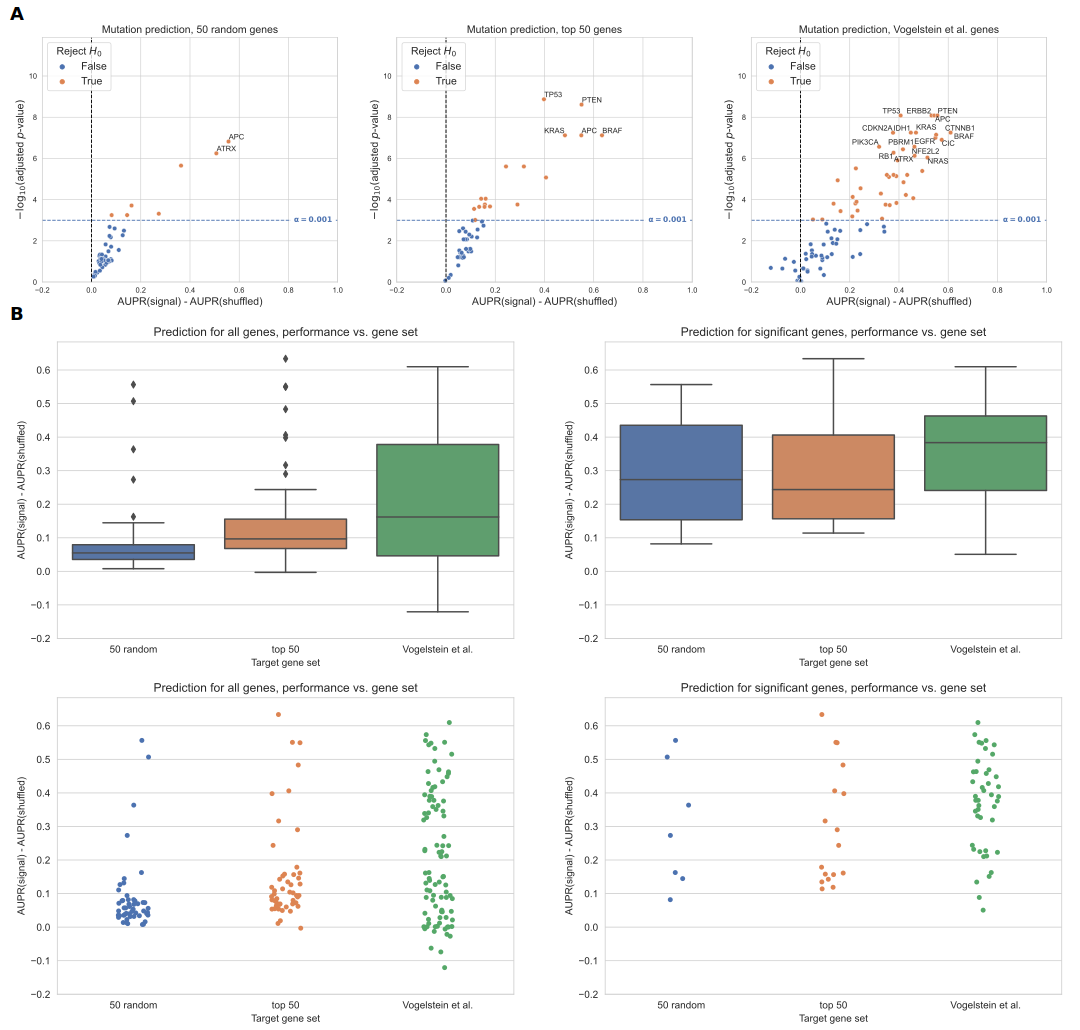

In [4]:
# Create panels for figure 1
panel_2a = make_figure_panel(
    os.path.join(cfg.images_dirs['mutation'], 'expression_vs_shuffled.svg'),
    scale_x_input=0.75,
    scale_y_input=0.75,
    x_loc=10,
    y_loc=20
)

panel_2b = make_figure_panel(
    os.path.join(cfg.images_dirs['mutation'], 'expression_boxes.svg'),
    scale_x_input=1,
    scale_y_input=1,
    x_loc=10,
    y_loc=320,
)

panel_2a_label = sg.TextElement(10, 20, "A", size=18, weight="bold", font="Verdana")
panel_2b_label = sg.TextElement(10, 320, "B", size=18, weight="bold", font="Verdana")

figure_2 = sg.SVGFigure("1080", "1030")
figure_2.append(
    [
        etree.Element("rect", {"width": "100%", "height": "100%", "fill": "white"}),
        panel_2a,
        panel_2b,
        panel_2a_label,
        panel_2b_label,
    ]
)
display(SVG(figure_2.to_str()))

In [5]:
cfg.paper_figures_dir.mkdir(exist_ok=True)
figure_2.save(cfg.paper_figures_dir / 'figure_1.svg')